Keras provides two APIs when building models: 
- Sequential API via `keras.models.Sequential`
- Functional API via `kears.Model`

In [1]:
import tensorflow as tf 
from tensorflow import keras

2023-04-18 07:07:19.940037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.10.0'

In [3]:
keras.__version__

'2.10.0'

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = (
    X_train_full[:5000] / 255.0,
    X_train_full[5000:] / 255.0
)
y_valid, y_train = (
    y_train_full[:5000],
    y_train_full[5000:]
)

In [8]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
# Creating the model using sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2023-04-18 07:08:09.947373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
model.get_layer("dense") is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()

In [19]:
# compile the model 
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)

In [20]:
# train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7169 - accuracy: 0.7618 - val_loss: 0.5092 - val_accuracy: 0.8314
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4910 - accuracy: 0.8296 - val_loss: 0.4363 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4451 - accuracy: 0.8436 - val_loss: 0.4213 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4189 - accuracy: 0.8527 - val_loss: 0.3991 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3982 - accuracy: 0.8600 - val_loss: 0.3912 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3819 - accuracy: 0.8669 - val_loss: 0.3747 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8712 - val_loss: 0.3869 - val_accuracy:

In [28]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

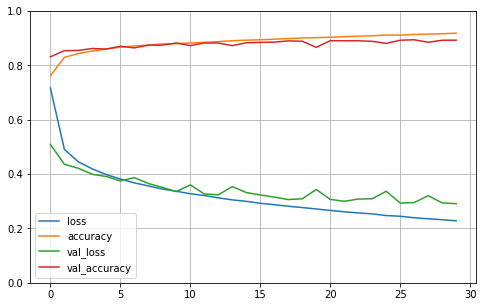

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
X_test.shape

(10000, 28, 28)

In [22]:
# evaluate
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.5700 - accuracy: 0.8469


[66.56995391845703, 0.8468999862670898]

In [62]:
# make predictions 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 30ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [65]:
# y_pred = model.predict_classes(X_new) deprecated!!!!
y_pred = np.argmax(y_proba, axis=1)

In [66]:
y_pred

array([9, 2, 1])

## Building a Regression MLP Using the Sequential API

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
housing = fetch_california_housing()

In [31]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [38]:
X_train.shape[1:]

(8,)

In [33]:
model = keras.models.Sequential()
model.add(
    keras.layers.Dense(
        30, 
        activation="relu",
        input_shape=X_train.shape[1:]
    )
)
model.add(keras.layers.Dense(1))

In [34]:
model.compile(
    loss="mean_squared_error", 
    optimizer="sgd"
)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0752 - val_loss: 0.5476
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5097 - val_loss: 0.4787
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4442 - val_loss: 0.4547
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 0.4395
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4224 - val_loss: 0.4380
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4092 - val_loss: 0.4338
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4140 - val_loss: 0.4317
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3998 - val_loss: 0.4238
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3938 - val_loss: 0.4247
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3905 - val_loss: 0.4179

In [90]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.5598


In [91]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 50ms/step


In [92]:
y_pred

array([[1.5753989],
       [3.177548 ],
       [2.409305 ]], dtype=float32)

In [93]:
y_test[:3]

array([2.875, 2.4  , 2.494])

## Building complex models using functional API

In [45]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concatenate = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concatenate)

model = keras.Model(inputs=[input_], outputs=[output])

In [46]:
model.compile(loss="mse", optimizer="sgd")

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           270         ['input_4[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 30)           930         ['dense_11[0][0]']               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_4[0][0]',                
                                                                  'dense_12[0][0]']           

In [49]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4822 - val_loss: 0.5809
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5019 - val_loss: 0.6464
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4576 - val_loss: 0.8960
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5348 - val_loss: 1.6294
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2182 - val_loss: 3.5000
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 16.3330 - val_loss: 11.7949
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 21.2721 - val_loss: 7.9692
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 39.9504 - val_loss: 22.7819
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 19.7063 - val_loss: 20.9624
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 415.2963 - val_los

In [50]:
X_train.shape

(11610, 8)

In [51]:
X_valid.shape

(3870, 8)

In [52]:
X_test.shape

(5160, 8)

In [64]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)

In [65]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [68]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3), loss="mse")

/Users/javlintor/hands-on-machine-learning/my_env/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [69]:
model.fit(
    (X_train[:, :5], X_train[:, 2:]), 
    y_train, 
    epochs=20, 
    validation_data=((X_valid[:, :5], X_valid[:, 2:]), y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4269 - val_loss: 0.4530
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4254 - val_loss: 0.4524
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4244 - val_loss: 0.4513
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4233 - val_loss: 0.4510
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4223 - val_loss: 0.4489
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4213 - val_loss: 0.4487
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4202 - val_loss: 0.4483
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4195 - val_loss: 0.4477
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4185 - val_loss: 0.4457
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4176 - val_loss: 0.4450

In [70]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 30)           930         ['dense_17[0][0]']               
                                                                                            